---
<h1 align='center' style="color:green"> Credit Card Fraud Detection</h1>

---

<img src='https://github.com/AnilNITT/Credit-Card-Fraud-Detection/blob/master/Scripts/image/img1.png?raw=1'>

## 1. Importing Necessary Libraries

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load The Data Set
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

## Download the dataset from there <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv" >click here </a>  

In [2]:
# Load the dataset from the csv file using pandas
data = pd.read_csv('C:/Users/savit/OneDrive/NM dataset.csv')
print(data.shape)
print(data.head())

(284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

In [3]:
# Start exploring the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
# take random rows for data
data = data.sample(frac=0.1, random_state = 1)  # frac=0.1 means choose random float value
data.head()
# V1 - V28 are the results of a PCA Dimensionality reduction to protect user identities and sensitive features

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0
21513,31717.0,-1.328271,1.018378,1.775426,-1.574193,-0.117696,-0.457733,0.681867,-0.031641,0.383872,...,-0.220815,-0.419013,-0.239197,0.009967,0.232829,0.814177,0.098797,-0.004273,15.98,0
134700,80923.0,1.276712,0.617120,-0.578014,0.879173,0.061706,-1.472002,0.373692,-0.287204,-0.084482,...,-0.160161,-0.430404,-0.076738,0.258708,0.552170,0.370701,-0.034255,0.041709,0.76,0


In [5]:
# Print the shape of the data
print(data.shape)

(28481, 31)


In [6]:
print(data.describe())

                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94705.035216     -0.001143     -0.018290      0.000795      0.000350   
std     47584.727034      1.994661      1.709050      1.522313      1.420003   
min         0.000000    -40.470142    -63.344698    -31.813586     -5.266509   
25%     53924.000000     -0.908809     -0.610322     -0.892884     -0.847370   
50%     84551.000000      0.031139      0.051775      0.178943     -0.017692   
75%    139392.000000      1.320048      0.792685      1.035197      0.737312   
max    172784.000000      2.411499     17.418649      4.069865     16.715537   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean      -0.015666      0.003634     -0.008523     -0.003040      0.014536   
std        1.395552      1.334985      1.2

In [7]:
data.isna().sum()  # no null value in any columns

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.info()  # No null value so we start plotting

<class 'pandas.core.frame.DataFrame'>
Index: 28481 entries, 169876 to 97365
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    28481 non-null  float64
 1   V1      28481 non-null  float64
 2   V2      28481 non-null  float64
 3   V3      28481 non-null  float64
 4   V4      28481 non-null  float64
 5   V5      28481 non-null  float64
 6   V6      28481 non-null  float64
 7   V7      28481 non-null  float64
 8   V8      28481 non-null  float64
 9   V9      28481 non-null  float64
 10  V10     28481 non-null  float64
 11  V11     28481 non-null  float64
 12  V12     28481 non-null  float64
 13  V13     28481 non-null  float64
 14  V14     28481 non-null  float64
 15  V15     28481 non-null  float64
 16  V16     28481 non-null  float64
 17  V17     28481 non-null  float64
 18  V18     28481 non-null  float64
 19  V19     28481 non-null  float64
 20  V20     28481 non-null  float64
 21  V21     28481 non-null  float64
 22

## Data Visualization

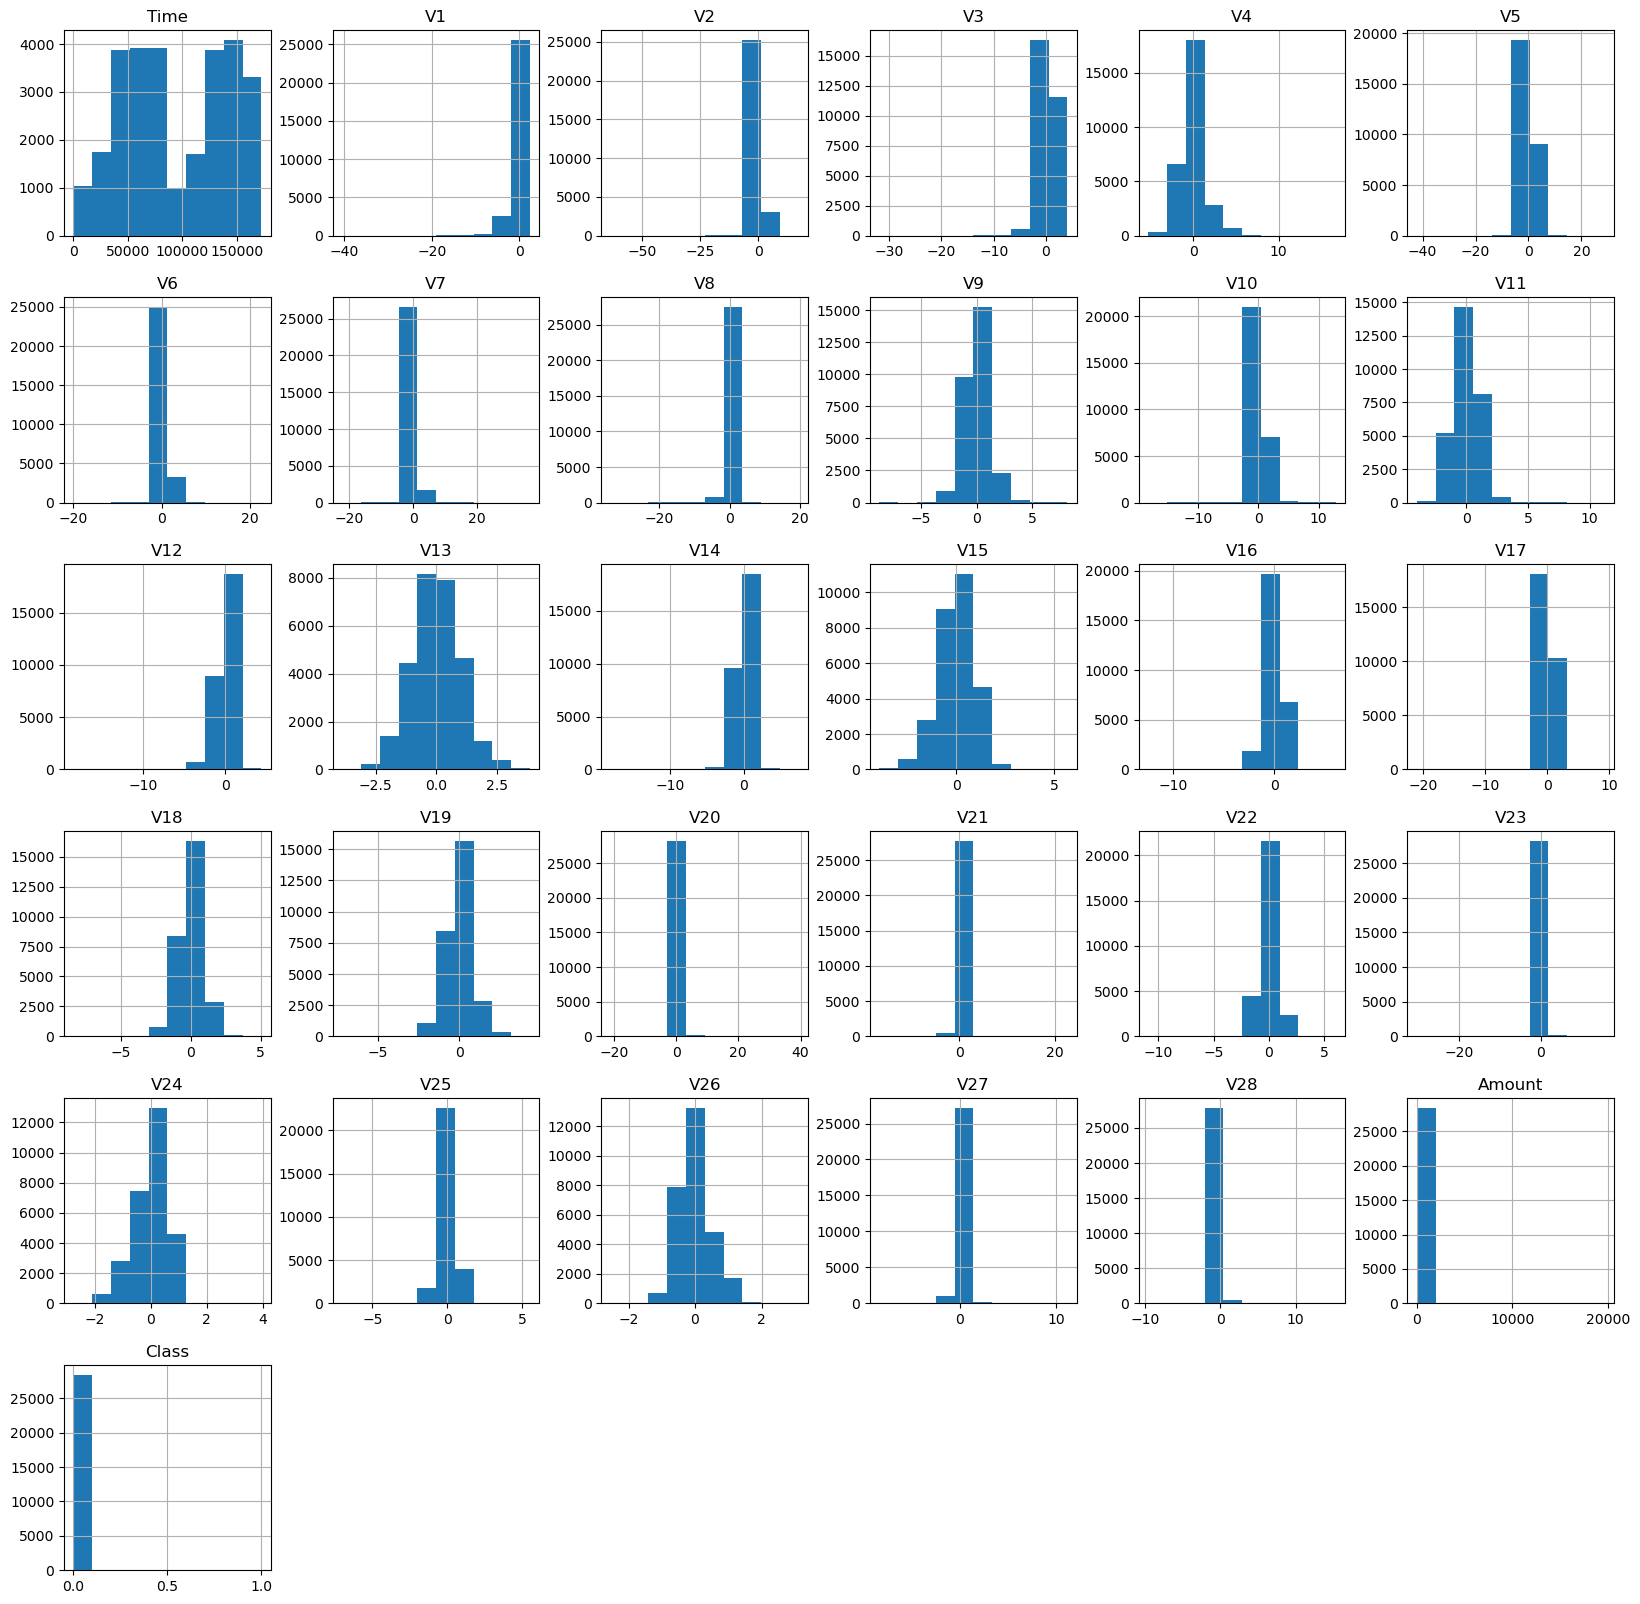

In [9]:
# Plot histograms of each parameter
data.hist(figsize = (20, 20))
plt.show()

In [10]:
# Determine number of fraud cases in dataset

Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud)/float(len(Valid))
print(outlier_fraction)

print('Fraud Cases       : {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))



0.0017234102419808666
Fraud Cases       : 49
Valid Transactions: 28432


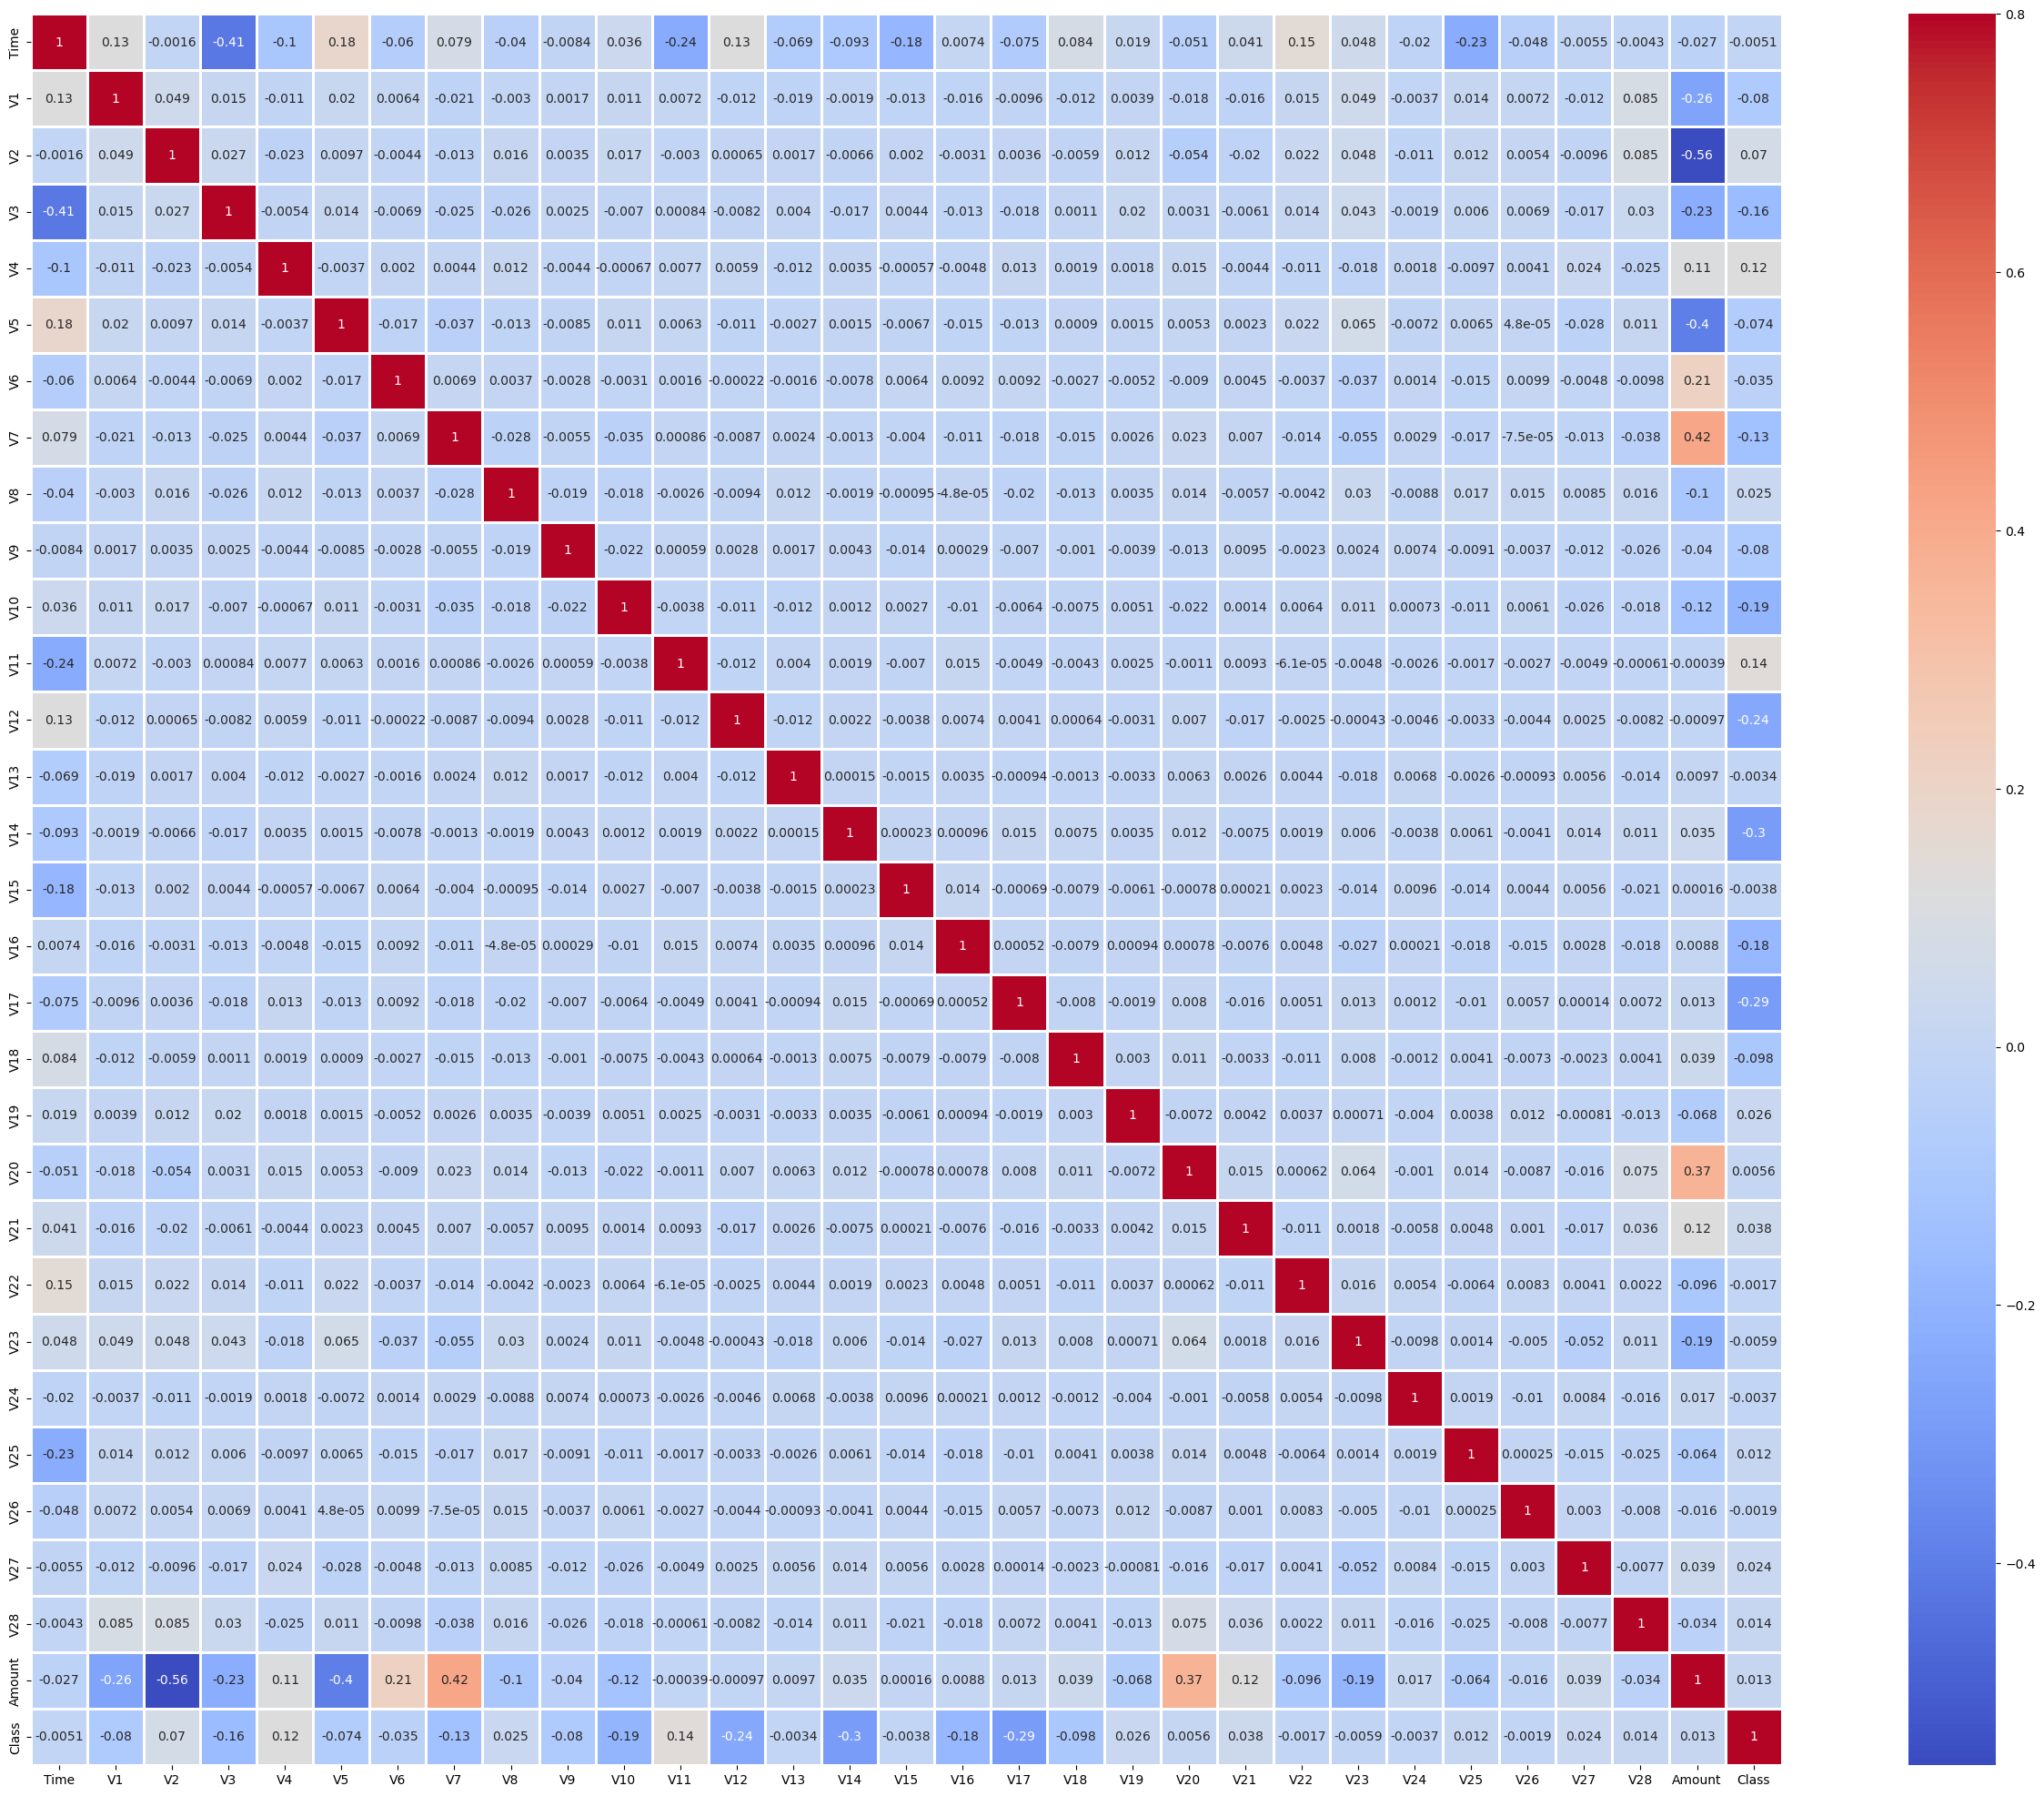

In [11]:
## Correlation matrix
corrmat=data.corr()
fig=plt.figure(figsize=(36,25))

sns.heatmap(corrmat, vmax = .8, square = True,annot=True,cmap="coolwarm",linewidth=2)
plt.show()

# Data processing

In [12]:
# Get all the columns from the dataFrame
columns = data.columns.tolist()
# print(columns)
print("shape of data",data.shape)
print()
# Filter the columns to remove data we do not want
columns = [c for c in columns if c not in ["Class"]]   # remove class columns bcoz we want to target with Class so
# print(columns)

# Store the variable we'll be predicting on
target = "Class"

X = data[columns]  # all the columns data there except class
Y = data[target]   # only Class columns data there

# Print shapes
print("X shape : ",X.shape)
print("Y shape : ",Y.shape)

shape of data (28481, 31)

X shape :  (28481, 30)
Y shape :  (28481,)


## Split data into Train n test datset

In [13]:
# split data into 80% train and 20% test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)  #0.2 means 20% test n 80% train data

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22784, 30)
(5697, 30)
(22784,)
(5697,)


In [15]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
20637,31172.0,1.081380,-0.808354,-0.075382,-2.219655,-0.696680,-0.523893,-0.261545,0.000618,1.679131,...,0.095880,0.308749,0.889073,-0.305266,-0.237899,0.703002,-0.597632,0.067376,0.023303,99.99
215628,140152.0,-0.219573,0.364497,0.650628,-0.245234,0.657173,0.824911,0.700127,0.198098,0.563869,...,0.005662,-0.079944,-0.001599,0.397672,-1.145711,-1.432307,-0.656639,0.137209,0.040315,85.06
272210,164968.0,2.050245,-0.346468,-2.571895,-1.156155,1.369042,0.625456,0.196785,0.141313,0.278761,...,-0.293740,0.134582,0.507608,0.078827,-0.878924,0.008064,1.063248,-0.107996,-0.111011,3.02
224227,143702.0,-6.122199,4.091185,-3.495669,-0.304348,-2.637439,-0.855252,-2.441024,3.913505,-0.701046,...,-1.026459,0.046612,-0.948586,0.155294,0.550086,1.064556,-0.396596,-1.615856,-0.431825,30.19
86493,61258.0,-1.933338,1.883129,-0.736065,-0.742869,-0.603784,0.184637,0.961916,0.876091,-1.204311,...,-0.593771,-0.202868,-0.906577,-0.009884,-0.902972,-0.149118,0.011736,-0.569260,-0.176868,194.85


In [16]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
231988,147004.0,-0.472661,-1.430584,-0.116832,-2.528959,0.975027,1.077347,-0.436959,0.426111,-2.597479,...,-0.020614,-0.074423,-0.127588,0.561987,-0.803431,-1.137093,-0.408330,0.208716,0.218764,100.00
223080,143238.0,-0.298687,0.932025,-0.460979,-0.922886,0.321475,-1.422644,0.773147,0.170359,0.025994,...,-0.491993,0.454823,1.210077,-0.065351,-0.020786,-0.816140,-0.406927,0.112648,0.187384,5.34
3594,3073.0,1.188739,-0.110925,-0.247423,-0.056450,-0.230669,-0.884735,0.252123,-0.107019,-0.128072,...,-0.053187,-0.339530,-1.248046,0.070858,-0.003754,0.148766,0.706722,-0.132117,-0.008134,58.92
147745,88926.0,0.080975,0.866882,-0.367443,-0.620509,0.801360,-0.530850,0.767727,0.137662,-0.093225,...,-0.070243,-0.291797,-0.798181,0.128168,0.560247,-0.531633,0.097231,0.211335,0.071850,5.49
110882,72013.0,-0.523168,0.504064,2.327159,1.033996,-0.256216,0.920008,0.123060,0.452847,0.348782,...,-0.110084,-0.211943,-0.184578,0.053897,0.224449,-0.507835,-0.653984,0.232471,0.162894,20.00


In [17]:
y_train.head()

20637     0
215628    0
272210    0
224227    0
86493     0
Name: Class, dtype: int64

In [18]:
y_test.head()

231988    0
223080    0
3594      0
147745    0
110882    0
Name: Class, dtype: int64

### Feature Scaling
#### Converting different units and magnitude data in one unit.

In [19]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)  # convert all data into float data type
X_test_sc=sc.transform(X_test)
X_test_sc.dtype

dtype('float64')

# Machine Learning Model Building

#### We have clean data to build the Ml model. But which Machine learning algorithm is best for the data we have to find. The output is a categorical format so we will use supervised classification machine learning algorithms.

#### To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.

#### import packages

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## 1. Support vector Classifier

In [21]:
from sklearn.svm import SVC
svc_classifier=SVC()
svc_classifier.fit(X_train,y_train)
y_pred_svc=svc_classifier.predict(X_test)
accuracy_score(y_test,y_pred_svc)

0.9989468141126909

In [22]:
# Trained With Standard Sclaer data
svc_clf_sc=SVC()
svc_clf_sc.fit(X_train_sc,y_train)
y_pred_svc_sc=svc_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_svc_sc)

0.9991223450939091

## 2. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(random_state=1,penalty="l2")
lr_clf.fit(X_train,y_train)
y_pred_lr=lr_clf.predict(X_test)
accuracy_score(y_test,y_pred_lr)

c:\Users\savit\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9994734070563455

In [24]:
## trained with Standard Scalar data
lr_clf_sc=LogisticRegression(random_state=1,penalty="l2")
lr_clf_sc.fit(X_train_sc,y_train)
y_pred_lr_sc=lr_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_lr_sc)

0.9991223450939091

## 3. K-Nearest Neighbors Classifier

In [25]:
# K-Nearest Neighbour Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=1)
knn_clf.fit(X_train,y_train)
y_pred_knn=knn_clf.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9989468141126909

In [26]:
# Train with Standard scalar data
knn_clf_sc=KNeighborsClassifier(n_neighbors=3,metric="minkowski",p=1)
knn_clf_sc.fit(X_train_sc,y_train)
y_pred_knn_sc=knn_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_knn_sc)

0.9996489380375636

## 4. Naive bayes Classifier

In [27]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)
y_pred_nb=nb_clf.predict(X_test)
accuracy_score(y_test,y_pred_nb)

0.9903457960329998

In [28]:
# train with Standard Scalar
nb_clf_sc=GaussianNB()
nb_clf_sc.fit(X_train_sc,y_train)
y_pred_nb_sc=nb_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_nb_sc)

0.9733192908548359

## 5. Decision Tree Classifier

In [29]:
# Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion="entropy",random_state=5)
dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)
accuracy_score(y_test,y_pred_dt)

0.9994734070563455

In [30]:
# train with Standard Scalar
dt_clf_sc=DecisionTreeClassifier(criterion="entropy",random_state=5)
dt_clf_sc.fit(X_train_sc,y_train)
y_pred_dt_sc=dt_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_dt_sc)

0.9994734070563455

## 6. Random Forest Classifier

In [31]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9996489380375636

In [32]:
# train with standard Scalar
rf_clf_sc=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf_sc.fit(X_train_sc,y_train)
y_pred_rf_sc=rf_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_rf_sc)

0.9996489380375636

## 7. AdaBoost Classifier

In [33]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abd_clf=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME",
                                                   random_state=1, )

abd_clf.fit(X_train,y_train)
y_pred_abd=abd_clf.predict(X_test)
accuracy_score(y_test,y_pred_abd)

0.9992978760751272

In [34]:
# Train with Standard Scalar
abd_clf_sc=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm="SAMME",
                             random_state=1,)
abd_clf_sc.fit(X_train_sc,y_train)
y_pred_abd_sc=abd_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_abd_sc)

0.9992978760751272

In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## 8. XGBoost Classifier

In [36]:
from xgboost import XGBClassifier
xgb_clf=XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred_xgb=xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

0.9996489380375636

In [37]:
# Train with Standard Scalar
xgb_clf_sc=XGBClassifier()
xgb_clf_sc.fit(X_train_sc,y_train)
y_pred_xgb_sc=xgb_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_xgb_sc)

0.9996489380375636

## XGBoost Parameter Tuning Ramdomized Search

In [38]:
# XGBoost classifier most required parameters
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [39]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,scoring='roc_auc', n_jobs=-1,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=No...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [40]:
random_search.best_params_

{'min_child_weight': 7,
 'max_depth': 6,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [41]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=7, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [42]:
from xgboost import XGBClassifier
import numpy as np
from sklearn.metrics import accuracy_score

xgb_classifier_pt = XGBClassifier(
    base_score=0.5, booster='gbtree', colsample_bylevel=1,
    colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
    learning_rate=0.1, max_delta_step=0, max_depth=15,
    min_child_weight=1, missing=np.nan, n_estimators=100, n_jobs=1,
    objective='binary:logistic', random_state=0,
    reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
    subsample=1, verbosity=1
)

xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_pt))


Accuracy: 0.9996489380375636


## Confusion Matrix

In [43]:
cm=confusion_matrix(y_test,y_pred_xgb_pt)
cm

array([[5690,    1],
       [   1,    5]], dtype=int64)

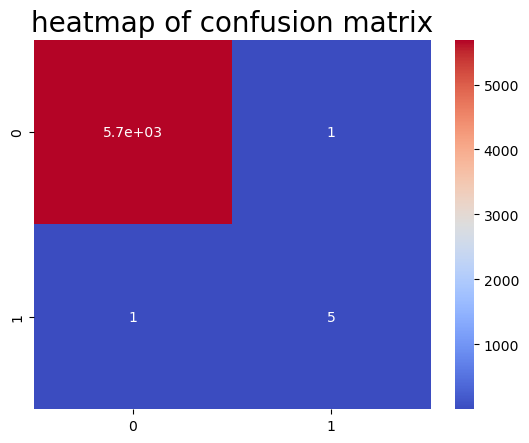

In [44]:
plt.title("heatmap of confusion matrix",fontsize=20)
sns.heatmap(cm,annot=True,cmap="coolwarm")
plt.show()

## Classification report of model

In [45]:
print(classification_report(y_test,y_pred_xgb_pt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5691
           1       0.83      0.83      0.83         6

    accuracy                           1.00      5697
   macro avg       0.92      0.92      0.92      5697
weighted avg       1.00      1.00      1.00      5697



### Define Xgb_model_pt2

In [46]:
# create xgb_model_pt2 estimator
xgb_model_pt2=XGBClassifier()
xgb_model_pt2.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Cross-validation of the ML model

In [47]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_model_pt2, X = X_train_sc, y = y_train, cv = 10)
# print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_classifier_pt, X = X_train_sc,y = y_train, cv = 10)
print("Cross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())

Cross validation of XGBoost model (in mean) =  0.9992099680211851
Cross validation accuracy of XGBoost model =  [0.99912242 1.         0.99956121 0.99868363 0.99912204 0.99868306
 0.99956102 0.99956102 0.99912204 0.99956102]

Cross validation mean accuracy of XGBoost model =  0.9992977450717143


### Save as Pickle

In [48]:
## pickle
import pickle

# Save model
pickle.dump(xgb_classifier_pt,open('CreditCard_fraud.pickle','wb'))

# load model
model1=pickle.load(open('CreditCard_fraud.pickle','rb'))

# predict the output
y_pred=model1.predict(X_test)

# Confusion matrix
print("Confusion matrix of XGBoost model: \n",confusion_matrix(y_test,y_pred),'\n')

# show the accuracy
print("Accuracy of XGBoost model= ",accuracy_score(y_test,y_pred))

Confusion matrix of XGBoost model: 
 [[5690    1]
 [   1    5]] 

Accuracy of XGBoost model=  0.9996489380375636


### We got a accuracy **99.96%** with XGBoost model

---
## 3. Unsupervised Outlier Detection

Now that we have processed our data, we can begin deploying our machine learning algorithms.  We will use the following techniques:

**Local Outlier Factor (LOF)**

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a
given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the
object is with respect to the surrounding neighborhood.


**Isolation Forest Algorithm**

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting
a split value between the maximum and minimum values of the selected feature.

Since recursive partitioning can be represented by a tree structure, the number of splittings required to
isolate a sample is equivalent to the path length from the root node to the terminating node.

This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.

Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees
collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

In [49]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# define random states
state = 1

# define outlier detection tools to be compared
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                        contamination=outlier_fraction,
                                        random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(
        n_neighbors=20,
        contamination=outlier_fraction)}

##  Fit the model


In [50]:
plt.figure(figsize=(9, 7))
n_outliers = len(Fraud)


for i, (clf_name, clf) in enumerate(classifiers.items()):

    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)

    # Reshape the prediction values to 0 for valid, 1 for fraud.
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1

    n_errors = (y_pred != Y).sum()

    # Run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print("Accuracy score : ",accuracy_score(Y, y_pred))
    print()
    print(classification_report(Y, y_pred))


Isolation Forest: 71
Accuracy score :  0.99750711000316

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy score :  0.9965942207085425

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



<Figure size 900x700 with 0 Axes>

In [51]:
import joblib

# Suppose 'model' is your trained classifier
joblib.dump(model1, 'fraud_model.pkl')



['fraud_model.pkl']